#### Actividad de tarea 
* Tome el archivo de colonias, lea y grafique coloreando por municipio. 
    * El object type es `colonias`, estos files no tienen subcarpetas como los del tren.
* Sobre el archivo de colonias agregue lo ya hecho de líneas del tren ligero. 
    * El objetivo de este punto es replicar la gráfica que ya existe de estaciones con nombres MÁS el plot de colonias. 
    * Para que te sea más fácil pregúntate, ¿necesitas modificar algo del `for` para que esto funcione? Solo ten cuidado con que todo tenga el mismo `CRS` (El `CRS` indicado a utilizar es el `"EPSG:4326"`)
    * Recuerda que para modificar el `CRS` de algo que ya sea un mapa (o sea que ya cuente con un `CRS`) debes usar el `to_crs`. 


Una excelente referencia: https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/


In [1]:
# Importamos los 3 objetos básicos
from shapely.geometry import Point, Polygon, LineString
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
def get_shp_files(basedir, object_type, file_type='.shp'):
    """ Lectura de archivos SHP anidados
    
    Este método nos permitirá leer archivos SHP que se encuetran en subcarpetas.
    
    Parámetros
    
    basedir: Directorio base en el cual se encuentran nuestras subcarpetas con archivos shp.
    object_type: Tipo de mapa a leer (las carpetas que descargamos traen muchos tipos dentro).
    file_type: Constante para solo leer archivos .shp
    """
    # Empezamos con el código diciéndonos qué rayos está leyendo
    print(f'--> Initiating with {file_type} file reading over {object_type} type of files.')
    
    # Juntamos el directorio original con el tipo de mapa a leer.
    final_dir = os.path.join(basedir, object_type)
    
    # Juntando todos los archivos del directorio
    existing_files = os.listdir(final_dir)
    
    # Variable respuesta, aquí tendremos todos los archivos
    returning_files = {}
    
    # Recorriendo archivo por archivo
    for existing_file in existing_files:

        # Condicional: ¿El archivo en cuestión es de los que nos interesan?
        if file_type in existing_file:

            # En efecto lo es, quítale la extensión ".shp"
            file_name = existing_file.strip(file_type)
            
            print(f'--> Found file {file_type}: {file_name}.')
                                            
            # Nuevo path: El específico para el archivo shp
            path_to_specific_file = os.path.join(final_dir, existing_file)
            
            # Leyéndolo con geopandas
            returning_files[file_name] = gpd.read_file(path_to_specific_file)
    
    # Listo
    print(f'Done with file seek over {object_type}.')
    return returning_files

In [3]:
supdir = '.'
basedir = os.path.join(supdir, 'colonias')
directorio = os.path.join(basedir, 'Colonias.shp')
colonias = gpd.read_file(directorio)
colonias.head()

,CP_COLONIA,MUNICIPIO,COLONIA,geometry
0,0.0,TLAQUEPAQUE,MIRADOR EL ALAMO,"POLYGON ((674657.966 2281812.001, 674792.992 2..."
1,0.0,TLAQUEPAQUE,SAN JUAN,"POLYGON ((681746.844 2277432.748, 681666.800 2..."
2,0.0,TONALA,LOMAS DEL CAMICHIN,"POLYGON ((679310.525 2283544.309, 679341.021 2..."
3,0.0,TONALA,LOMAS DE LA SOLEDAD,"POLYGON ((680259.801 2283805.944, 680275.186 2..."
4,0.0,TONALA,LOMAS DEL MANANTIAL,"POLYGON ((680635.522 2282294.889, 680630.678 2..."


In [4]:
colonias = colonias.to_crs('EPSG:4326')
colonias

,CP_COLONIA,MUNICIPIO,COLONIA,geometry
0,0.0,TLAQUEPAQUE,MIRADOR EL ALAMO,"POLYGON ((-103.32375 20.62740, -103.32244 20.6..."
1,0.0,TLAQUEPAQUE,SAN JUAN,"POLYGON ((-103.25619 20.58717, -103.25699 20.5..."
2,0.0,TONALA,LOMAS DEL CAMICHIN,"POLYGON ((-103.27894 20.64261, -103.27865 20.6..."
3,0.0,TONALA,LOMAS DE LA SOLEDAD,"POLYGON ((-103.26980 20.64488, -103.26966 20.6..."
4,0.0,TONALA,LOMAS DEL MANANTIAL,"POLYGON ((-103.26635 20.63119, -103.26640 20.6..."
...,...,...,...,...
1145,0.0,ZAPOPAN,PUERTAS DEL SOL,"POLYGON ((-103.43622 20.69448, -103.43573 20.6..."
1146,0.0,ZAPOPAN,VILLAS MEDITERRÁNEO,"POLYGON ((-103.43706 20.69022, -103.43754 20.6..."
1147,0.0,ZAPOPAN,SANTANDER,"POLYGON ((-103.43663 20.69004, -103.43706 20.6..."
1148,45117.0,ZAPOPAN,PARQUE LA CASTELLANA,"POLYGON ((-103.43593 20.68968, -103.43663 20.6..."


In [5]:
basedir_tren = os.path.join(supdir, 'tren-ligero', 'tren_ligero-gdl')

# Leyendo el mapa de líneas del tren ligero

lineas = get_shp_files(basedir=basedir_tren, object_type='lineas')

# Leyendo el mapa de estaciones del tren ligero
estaciones = get_shp_files(basedir=basedir_tren, object_type='estaciones')

--> Initiating with .shp file reading over lineas type of files.
--> Found file .shp: c_tren_l1.
--> Found file .shp: c_tren_l2.
--> Found file .shp: c_tren_l3.
Done with file seek over lineas.
--> Initiating with .shp file reading over estaciones type of files.
--> Found file .shp: c_est_tren_l1.
--> Found file .shp: c_est_tren_l2.
--> Found file .shp: c_est_tren_l3.
Done with file seek over estaciones.


In [6]:
ESTACIONES = list(estaciones.keys())
LINEAS = list(lineas.keys())

#Estandarización del CRS
estaciones_l1 = estaciones['c_est_tren_l1'].to_crs('EPSG:4326')
linea1 = lineas['c_tren_l1'].to_crs('EPSG:4326')

estaciones_l2 = estaciones['c_est_tren_l2'].to_crs('EPSG:4326')
linea2 = lineas['c_tren_l2'].to_crs('EPSG:4326')

estaciones_l3 = estaciones['c_est_tren_l3'].to_crs('EPSG:4326')
linea3 = lineas['c_tren_l3'].to_crs('EPSG:4326')


In [7]:
colonias.columns

Index(['CP_COLONIA', 'MUNICIPIO', 'COLONIA', 'geometry'], dtype='object')

<Axes: >

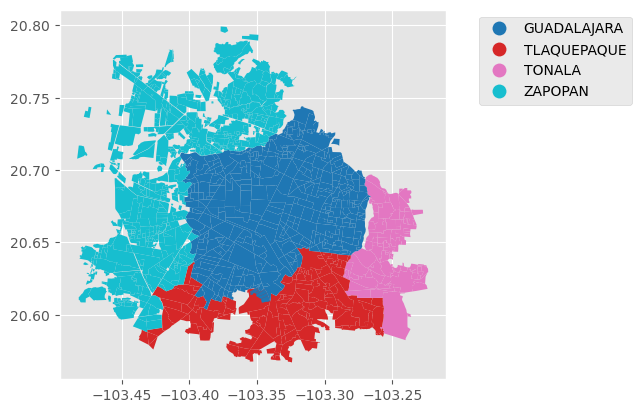

In [8]:
#experimento
colonias.plot(
    categorical=True,
    column='MUNICIPIO',
    legend_kwds={'bbox_to_anchor': (1.5, 1)},
    legend=True)

## Líneas del tren y estaciones por municipio

<Axes: >

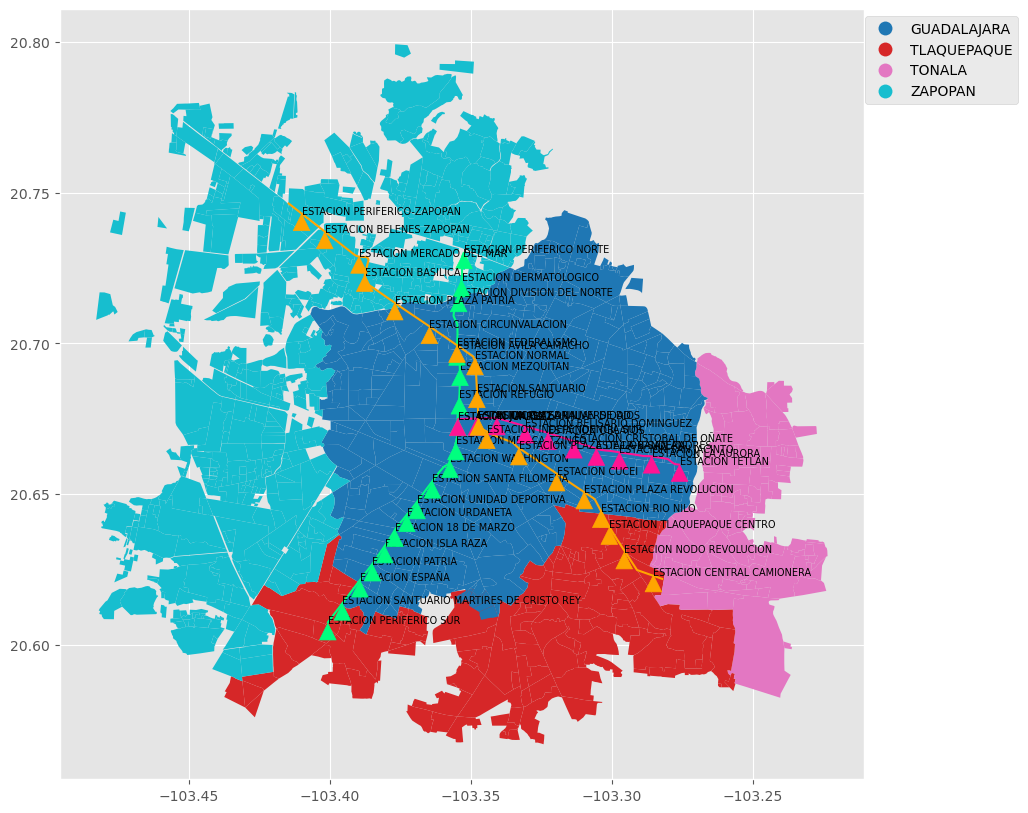

In [10]:
# Definiendo el espacio de graficado
fig, ax = plt.subplots(figsize=(30, 10))

# Constante para la fuente
fontsize = 7

# Diccionario de colores: Uno para cada línea
colors = {0: 'springgreen', 1: 'deeppink', 2: 'orange'}


for index in range(len(lineas)):
    linea_key = list(lineas.keys())[index]
    estacion_key = list(estaciones.keys())[index]
    
    if 'NOMBRE' in lineas[linea_key].columns:
        linea_col = 'Nombre1'
    else:
        linea_col = 'Name'
        
    if 'NOMBRE' in estaciones[estacion_key].columns:
        estacion_col = 'NOMBRE'
    else:
        estacion_col = 'Name'  
    
    linea_name = lineas[linea_key][linea_col].iloc[0] #equivalente a que busque en el primer renglón y se pueda manipular
    
    
    #gráfica
    lineas[linea_key].to_crs('EPSG:4326').plot(ax=ax, color=colors[index], label=f'Línea {linea_name}')
    
    points = estaciones[estacion_key].to_crs('EPSG:4326').apply(
        lambda x: [y for y in x['geometry'].coords[0]], axis=1
    ) #recorre los elementos de geometry y con el .coords se extrae como lista las coordenadas
    
    for point_idx, point in enumerate(points):
        angle = 0
        x, y = point[0], point[1] #extracción de puntos
        estacion_name = estaciones[estacion_key].loc[point_idx, estacion_col]
        
        #annotate ayuda a graficar texto
        ax.annotate(estacion_name, 
                   (x, y),
                   fontsize=fontsize,
                   rotation=angle, 
                   arrowprops=dict(color=colors[index])
                   )
ax.legend(fontsize=fontsize)
colonias.plot(
    categorical=True,
    column='MUNICIPIO',
    legend_kwds={'bbox_to_anchor': (1.2, 1)},
    legend=True, 
    ax=ax)